In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=f0bbc91179a3904ead0fc138457da97707a653679a03da4d56d6f49eef524b7e
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
!pip install lime shap scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9d919c08e55ae3b0d1aa875691316ec7bec3e390d7b06b973e08073df6f41ff8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa
from tempfile import TemporaryFile
from sklearn.preprocessing import normalize

import os
import math
import pickle
import random
import operator


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import cv2
from sklearn.model_selection import train_test_split

In [ ]:
import os
root = "/content/drive/MyDrive/Data"
os.chdir(root)

In [ ]:
audio_data_path = "/content/drive/MyDrive/Data/genres_original"
music_data = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
music_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
music_data['label'].value_counts()

,count
label,
blues,100
classical,100
country,100
disco,100
hiphop,100
jazz,100
metal,100
pop,100
reggae,100


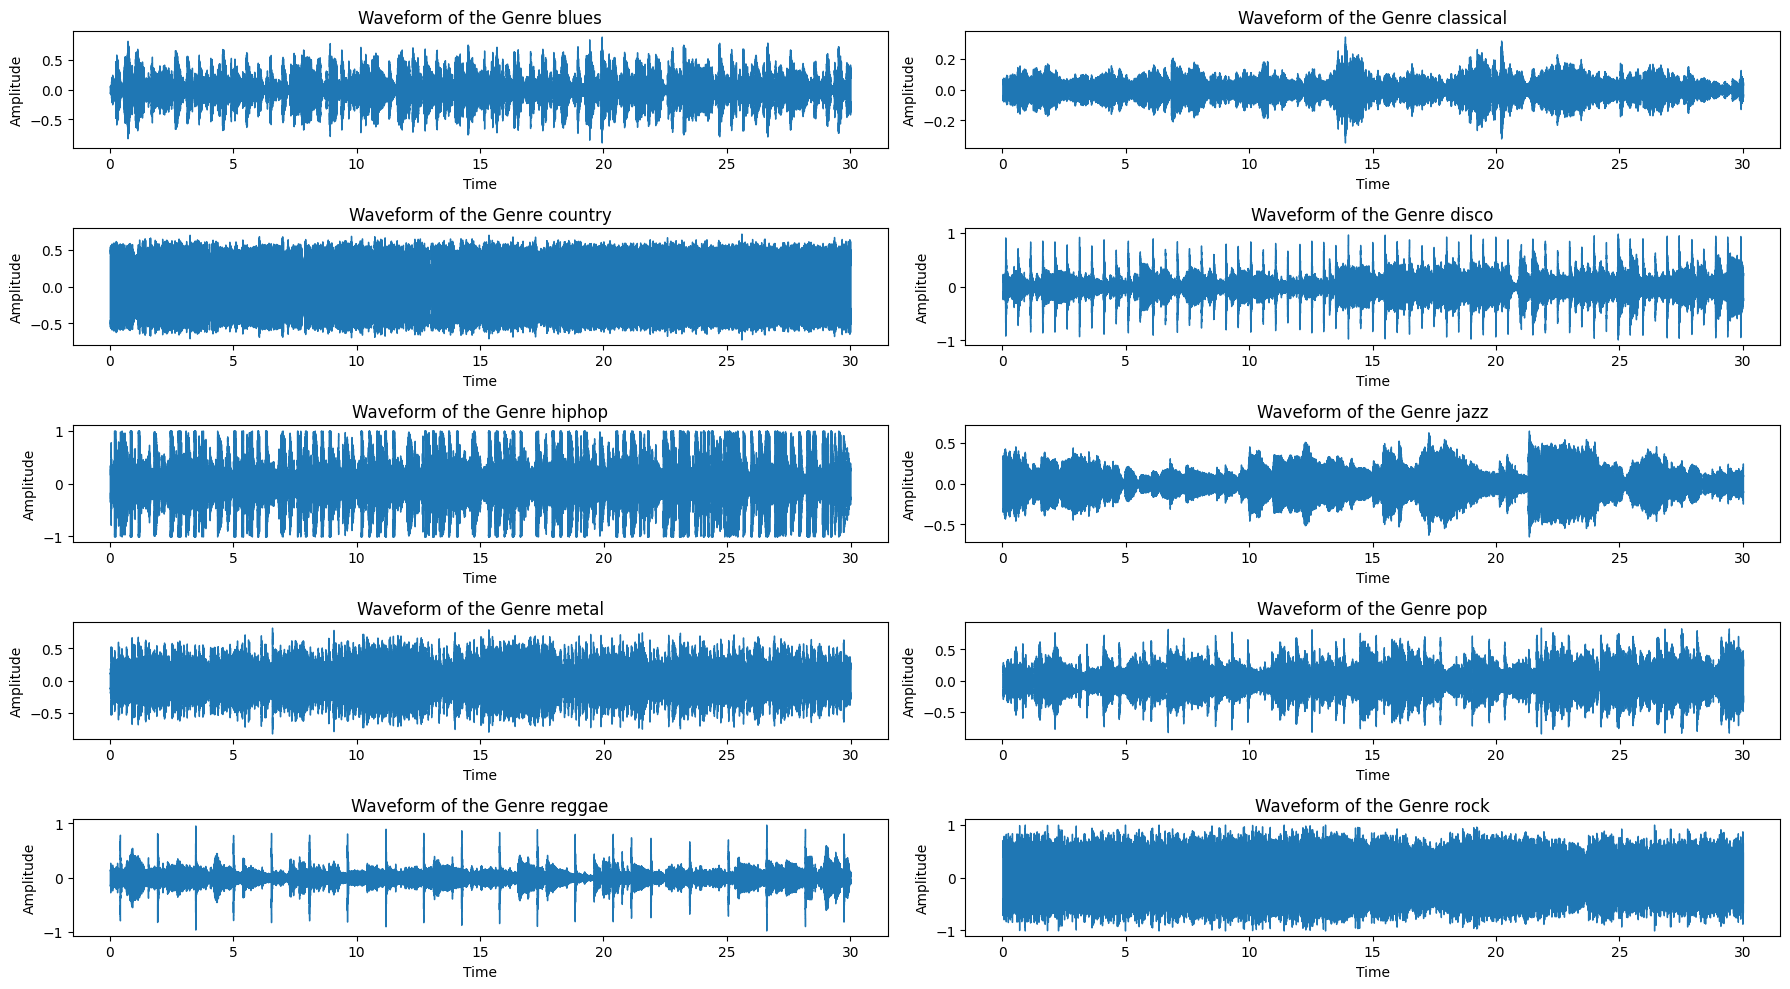

In [ ]:

plt=reload(plt)
base_path = '/content/drive/MyDrive/Data/genres_original/'

# List of genre folders
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


plt.figure(figsize=(18, 10))

# Loop through each genre and plot the waveform
for i, genre in enumerate(genres):

    genre_folder = os.path.join(base_path, genre)
    audio_files = os.listdir(genre_folder)
    path = os.path.join(genre_folder, audio_files[0])
    plt.subplot(5, 2, i + 1)
    x, sr = librosa.load(path)
    librosa.display.waveshow(x, sr=sr)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of the Genre {genre}')

plt.tight_layout()

# Show the combined plot
plt.show()

<ipython-input-11-b1eb74eb9e4d>:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')


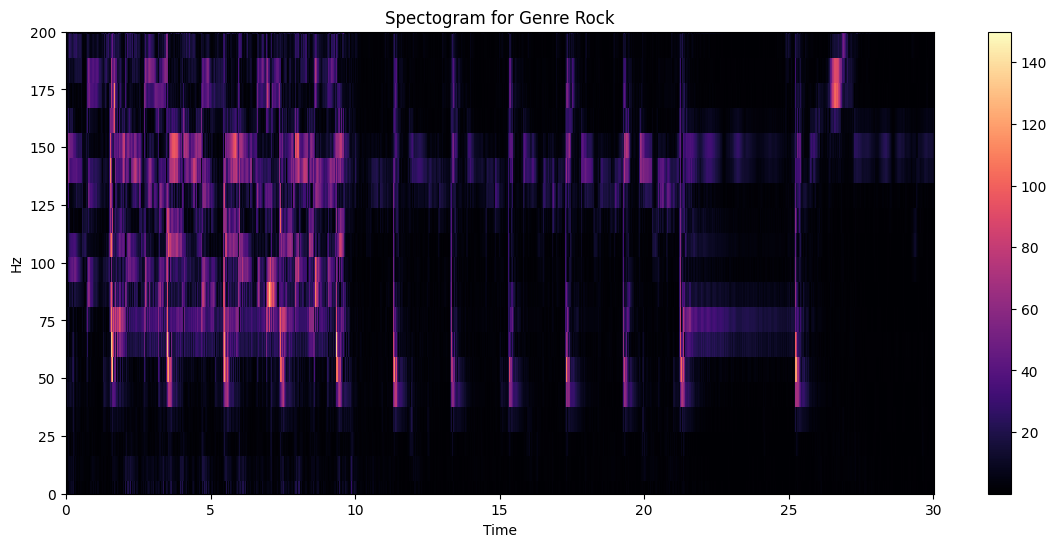

In [ ]:
data, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/rock/rock.00000.wav')
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize =(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.ylim(0, 200)
plt.title('Spectogram for Genre Rock')
plt.colorbar()


<ipython-input-43-85c1089e1c97>:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')


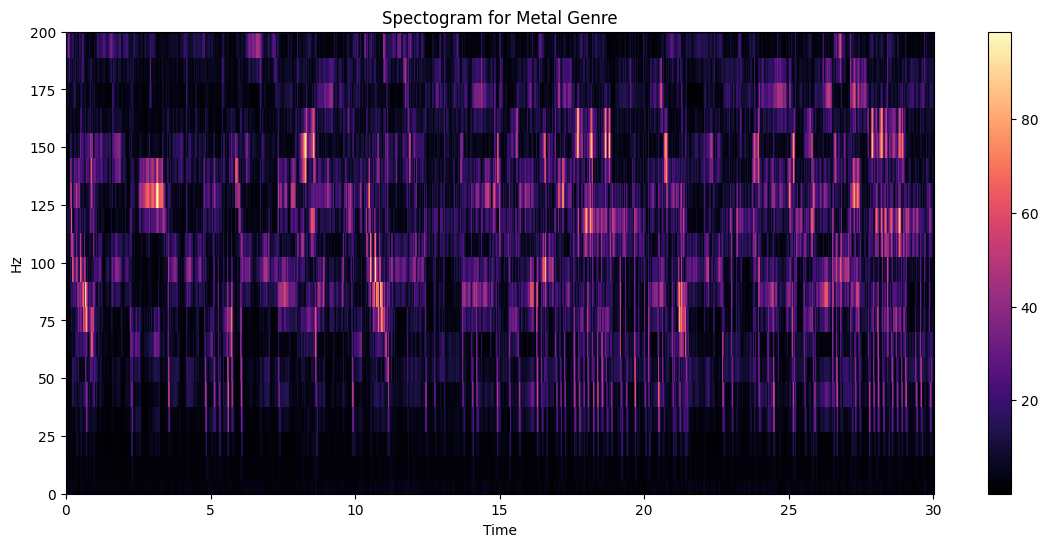

In [ ]:
data, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/metal/metal.00000.wav')
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize =(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.ylim(0, 200)
plt.title('Spectogram for Metal Genre')
plt.colorbar()


In [ ]:
! pip install -q kaggle

In [ ]:
!pip install soundfile

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import soundfile  # Import the soundfile module
import audioread # Import the audioread module

In [ ]:
Root = "/content/drive/MyDrive/Data"
os.chdir(Root)

In [ ]:
MAX_FILES_PER_GENRE = 100

def extract_features(file_path):
  try:
    y, sr = librosa.load(file_path, duration=30)
    features = np.array([])

    # MFCC feature
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    features = np.hstack((features, mfccs_mean))

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)
    features = np.hstack((features, spectral_contrast_mean))

    # Tonnetz
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    tonnetz_mean = np.mean(tonnetz.T, axis=0)
    features = np.hstack((features, tonnetz_mean))

    return features

  except (librosa.util.exceptions.ParameterError,
            soundfile.LibsndfileError,  # Explicitly catching soundsndfile errors
            audioread.exceptions.NoBackendError) as e:  # Explicitly catching audioread errors
        print(f"Error loading file {file_path}: {e}")
        return None  # Return None if there's an error


In [ ]:


genres = os.listdir(os.path.join(Root, 'genres_original'))

dataset = []

for genre in genres:
    genre_path = os.path.join(Root, 'genres_original', genre)
    files_processed = 0
    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
             file_path = os.path.join(genre_path, file)
             features = extract_features(file_path)
             if features is not None:
                 dataset.append([features, genre])
                 files_processed += 1
                 if files_processed >= MAX_FILES_PER_GENRE:
                    break


<ipython-input-45-87cf5127aac3>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading file /content/drive/MyDrive/Data/genres_original/jazz/jazz.00054.wav: 


In [58]:
df = pd.DataFrame(dataset, columns=['feature', 'label'])
df_features = pd.DataFrame(df['feature'].values.tolist())
df_labels = df['label']

#Prepare Data for Training
X = df_features.values
y = df_labels.values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Implement KNN Classifier
k = 5  # Adjust based on experimentation
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

# Make Predictions and Evaluate Model
y_pred = knn.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 59.50%

Classification Report:
              precision    recall  f1-score   support

       blues       0.58      0.55      0.56        20
   classical       0.80      1.00      0.89        20
     country       0.52      0.60      0.56        20
       disco       0.52      0.70      0.60        20
      hiphop       0.42      0.50      0.45        20
        jazz       0.76      0.65      0.70        20
       metal       0.71      0.85      0.77        20
         pop       0.54      0.70      0.61        20
      reggae       0.58      0.35      0.44        20
        rock       0.33      0.05      0.09        20

    accuracy                           0.59       200
   macro avg       0.58      0.59      0.57       200
weighted avg       0.58      0.59      0.57       200


Confusion Matrix:
[[11  0  2  3  1  0  0  0  2  1]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  1 12  1  0  4  0  2  0  0]
 [ 0  0  1 14  3  0  0  2  0  0]
 [ 2  0  0  2 10  0  3  1  2  0]
 [ 0  3  0  0  2

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at each leaf node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Fit the model
best_rf_model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

import numpy as np

def augment_audio(y):
    # Pitch shifting
    y_shifted = librosa.effects.pitch_shift(y, sr=22050, n_steps=4)
    return y_shifted

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Transform y_train to numerical labels
y_test = le.transform(y_test)  # Transform y_test using the same encoder

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)  # Now fit with numerical labels

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

y_pred_numeric = xgb_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_numeric)

# Calculate accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.695
XGBoost Accuracy: 0.665


In [ ]:
def predict_genre(file_path, knn_model, scaler):
    # Extract features from the new audio file
    features = extract_features(file_path).reshape(1, -1)

    # Standardize features using the previously fitted scaler
    features_scaled = scaler.transform(features)

    # Predict the genre
    genre_prediction = knn_model.predict(features_scaled)

    return genre_prediction[0]

file_path = "/content/drive/MyDrive/Data/genres_original/disco/disco.00000.wav"  # using a file from our dataset to test the model
predicted_genre = predict_genre(file_path, knn, scaler)
print(f"The predicted genre is: {predicted_genre}")

The predicted genre is: disco
